In [17]:
import get_tweets
import praw
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

%matplotlib inline

In [2]:
reddit = praw.Reddit(client_id='TcwTWLwCeSbE3g', client_secret='hqabrJIfgOCf6Vh-aW0HbLJq9-k', user_agent='datatools_project')

In [3]:
liberal_sub = reddit.subreddit('liberal').top("year",limit=1000)
count = 0
posts = []
words = []
for post in liberal_sub:
    count+=1
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
    for word in post.title.split():
        words.append(word)
posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])

14562

In [4]:
posts

,title,score,id,subreddit,url,num_comments,body,created
0,Trump reportedly rejected aggressive coronavir...,884,fi1f97,Liberal,https://theweek.com/speedreads/902009/trump-re...,58,,1.584142e+09
1,Trump claims we are the laughing stock of the ...,857,gv2l7u,Liberal,https://www.reddit.com/r/Liberal/comments/gv2l...,72,"[Donald says we are ""laughing stock of world""]...",1.591111e+09
2,Trump Shrugged Off Repeated Intelligence Warni...,807,fmdyo9,Liberal,https://www.huffpost.com/entry/coronavirus-tru...,59,,1.584821e+09
3,Asian-American Journalist Says Trump White Hou...,788,fkz9rw,Liberal,https://www.mediaite.com/news/asian-american-j...,186,,1.584602e+09
4,Gallup: Trump’s net approval rating drops 19 p...,775,h0z0uw,Liberal,https://www.axios.com/gallup-poll-trump-approv...,94,,1.591910e+09
...,...,...,...,...,...,...,...,...
995,WH Vows To ‘Take Appropriate Action’ Against O...,5,f8zb3b,Liberal,https://talkingpointsmemo.com/news/white-house...,3,,1.582611e+09
996,A discussion on public policy creation in the US,4,f6d48h,Liberal,https://www.reddit.com/r/Liberal/comments/f6d4...,0,Public policy creation is often considered a B...,1.582158e+09
997,What are your opinions on Andrew Yang?,4,ex9czk,Liberal,https://www.reddit.com/r/Liberal/comments/ex9c...,44,I just want to ask this 2 days before the cauc...,1.580606e+09
998,A new trend that could help explain the rise o...,5,evwd3r,Liberal,https://www.sciencedaily.com/releases/2018/03/...,0,,1.580373e+09


In [6]:
len(words)

14562

In [11]:
from nltk.corpus import stopwords

stop_words = stopwords.words("english")
stop_words.append("-")
stop_words.append("--")
stop_words.append("|")
stop_words.append("—")

trumps = ["Trump", "Trump's", "Trump’s"]
US = ["US", "U.S."]

dicw = {}
for wrd in words:
    if wrd.lower() not in stop_words:
        if wrd in trumps:
            wrd="Trump"
        if wrd in US:
            wrd = "U.S."
        
        if wrd not in dicw.keys():
            dicw[wrd]=0
        else:
            dicw[wrd]+=1

topp = sorted(dicw, key=dicw.get, reverse=True)[:35]
for i in topp:
    print(i,dicw[i])

Trump 480
U.S. 61
House 49
Biden 45
coronavirus 44
says 38
White 32
Democrats 30
Republicans 30
Coronavirus 29
Ukraine 28
New 26
impeachment 26
Donald 24
new 24
would 23
President 22
Court 21
2020 20
Fox 19
election 18
president 18
America 18
could 17
News 17
Senate 17
like 16
Congress 15
people 14
Giuliani 14
Russia 13
Supreme 13
pandemic 13
million 13
Americans 13


In [13]:
posts.title = posts.title.apply(get_tweets.text_cleaner)      
posts.to_csv('data/reddit-Liberal.csv')

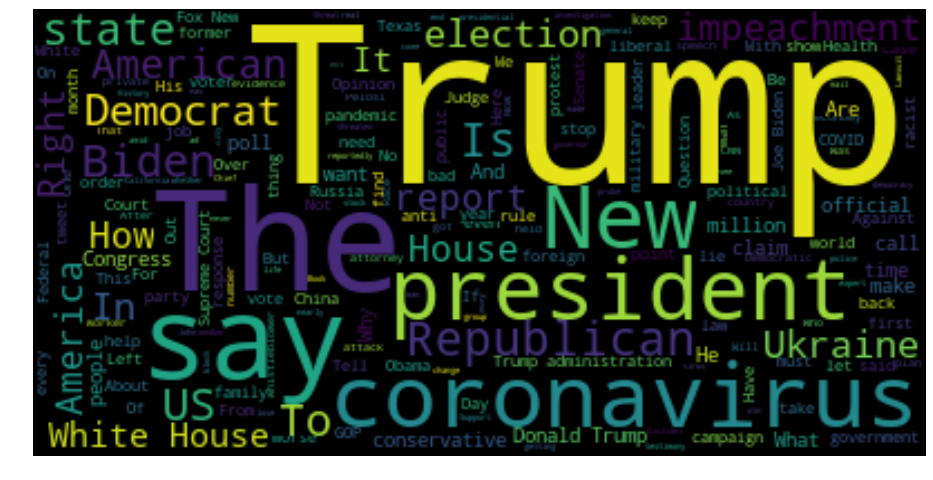

In [18]:
headlines = ' '.join(posts.title.to_list())
wordcloud = WordCloud().generate(headlines)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()